In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


# Read the data
data = pd.read_csv(r'C:\Users\yanni\Desktop\Try\TryTopShot.csv', sep=';')

# Split the data in the first column into 23 columns
data = data[data.columns[0]].str.split(';', expand=True)

# Assign new column names
data.columns = ['tag', 'moment', 'time', 'price', 'added']

# Keep only the columns in scope
data = data[['time', 'moment', 'price']]

# Clean up the time column
data["time"] = pd.to_datetime(data["time"], format="%a ú %m/%d/%Y ú %I:%M %p").dt.strftime("%m/%d/%Y")
data['time'] = pd.to_datetime(data['time'], format='%m/%d/%Y')

# Clean up the price column
data['price'] = data['price'].str[2:].replace('', '0').astype('int')



In [6]:
# Create a dataframe with the count of transaction of specific moment each day
data_count_moment = data.groupby(['time','moment'])['moment'].count().to_frame().rename(columns={'moment':'count'}).reset_index(drop=False)
data_count_moment = data_count_moment[(data_count_moment.time >= '2022-10-01') & (data_count_moment.time <= '2023-03-31')]
data_count_moment

,time,moment,count
1306,2022-10-01,A. BurksAlec BurksNYBase Set - S2 - ABase Set ...,1
1307,2022-10-01,A. RiversAustin RiversNYBase Set - S2 - 3Base ...,4
1308,2022-10-01,C. ReddishCam ReddishNYFresh Thre... - S3 - LF...,3
1309,2022-10-01,D. RoseDerrick RoseNY2021 NBA P... - S2 - A202...,2
1310,2022-10-01,D. RoseDerrick RoseNYBase Set - S3 - ABase Set...,20
...,...,...,...
9751,2023-03-31,Q. GrimesQuentin GrimesNYBase Set - S3 - 3Base...,3
9752,2023-03-31,R. BarrettRJ BarrettNY2021 NBA P... - S2 - D20...,1
9753,2023-03-31,R. BarrettRJ BarrettNYBase Set - S3 - DBase Se...,2
9754,2023-03-31,R. BarrettRJ BarrettNYBase Set - S4 - DBase Se...,5


In [70]:
# data_count_moment ist grosse Tabelle, wo alles drin ist -> nicht überschreiben!
data_count_moment[(data_count_moment.moment == 'J. RandleJulius RandleNYBase Set - S1 - DBase Set - S1 - Dunk') 
                  & (data_count_moment.time.dt.month==1)]

,time,moment,count
5658,2023-01-02,J. RandleJulius RandleNYBase Set - S1 - DBase ...,1
5704,2023-01-03,J. RandleJulius RandleNYBase Set - S1 - DBase ...,2
5757,2023-01-04,J. RandleJulius RandleNYBase Set - S1 - DBase ...,1
5812,2023-01-05,J. RandleJulius RandleNYBase Set - S1 - DBase ...,2
5859,2023-01-06,J. RandleJulius RandleNYBase Set - S1 - DBase ...,1
5902,2023-01-07,J. RandleJulius RandleNYBase Set - S1 - DBase ...,1
5946,2023-01-08,J. RandleJulius RandleNYBase Set - S1 - DBase ...,1
6027,2023-01-10,J. RandleJulius RandleNYBase Set - S1 - DBase ...,3
6072,2023-01-11,J. RandleJulius RandleNYBase Set - S1 - DBase ...,2
6305,2023-01-16,J. RandleJulius RandleNYBase Set - S1 - DBase ...,21


In [71]:
# Create a dataframe with the mean price of moment each day
data_mean_price = data.groupby(['moment','time'])['price'].mean().to_frame().reset_index(drop=False)

grouper = data_mean_price.groupby('moment')
result = pd.DataFrame()

start_date = '2022-10-01'
end_date = '2023-03-31'
idx = pd.date_range(start_date, end_date)
daterange = pd.DataFrame(index=idx)


# Loop through the splits (split by moment)
for group in grouper:

    # Set time column as index
    df = group[1].set_index('time', drop=True)
    df = daterange.join(df, how='left')
    df['moment'] = group[0]
    df = df.ffill().bfill()
    
    result = pd.concat([result, df])

# Reassign dataframe
data_mean_price = result 


In [74]:
# Filter dataframe
data_mean_price[data_mean_price.moment == 'J. RandleJulius RandleNYBase Set - S1 - DBase Set - S1 - Dunk']

#filtered_data.to_csv('~/Desktop/meine.csv', index=False)



,moment,price
2022-10-01,J. RandleJulius RandleNYBase Set - S1 - DBase ...,31.0
2022-10-02,J. RandleJulius RandleNYBase Set - S1 - DBase ...,30.5
2022-10-03,J. RandleJulius RandleNYBase Set - S1 - DBase ...,29.0
2022-10-04,J. RandleJulius RandleNYBase Set - S1 - DBase ...,28.5
2022-10-05,J. RandleJulius RandleNYBase Set - S1 - DBase ...,28.0
...,...,...
2023-03-27,J. RandleJulius RandleNYBase Set - S1 - DBase ...,22.0
2023-03-28,J. RandleJulius RandleNYBase Set - S1 - DBase ...,22.0
2023-03-29,J. RandleJulius RandleNYBase Set - S1 - DBase ...,22.0
2023-03-30,J. RandleJulius RandleNYBase Set - S1 - DBase ...,24.0


In [75]:
filtered_data = data_mean_price[data_mean_price.moment == 'J. RandleJulius RandleNYBase Set - S1 - DBase Set - S1 - Dunk']
filtered_data.to_csv('~/Desktop/meine_daten.csv', index=False)


In [3]:
# Read and clean up data
data_tw = pd.read_excel('C:/Users/yanni/Desktop/Try/NBATopShotDataAgregated.xlsx', sheet_name='Clean Tweets').iloc[:182]
data_tw['datum'] = pd.to_datetime(data_tw['datum '], format='%Y-%m-%d')
data_tw['resultat'] = data_tw['resultat'].replace('Na', np.nan)
data_tw = data_tw[['datum', 'resultat', 'trans norm', 'tw #knicks norm', 'ferien', 'tw #NewYorkForever norm', 'tw #NBATopShot norm', 'tw #NBATopShotThis norm', 'tw #NBA norm', 'tw #NFT norm', 'tw #Crypto norm', 'BK norm', 'ETH norm', 'Preis Moment norm']].set_index('datum', drop=True)

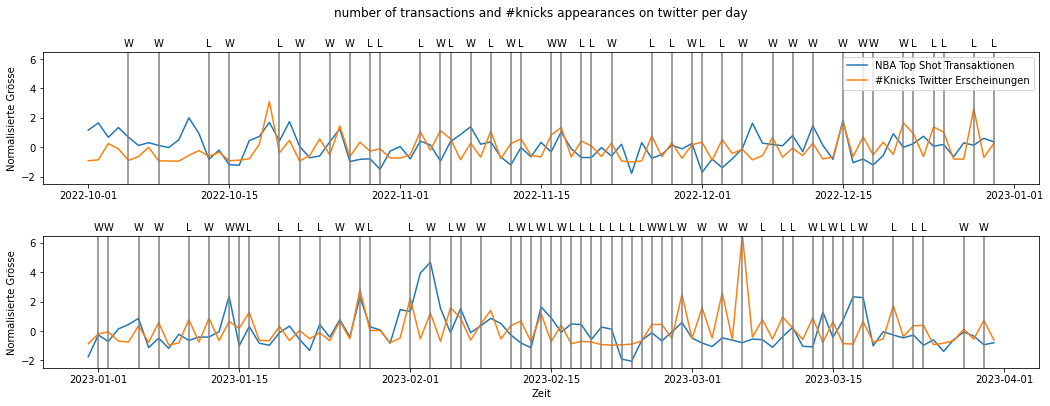

In [533]:
# Define how often to split the data (with =2: oct-jan, jan-april)
data_split = 2

# Initialize plot
fig, axs = plt.subplots(data_split, 1, figsize=(15, 6))

# Loop through subplots
for i in range(data_split):

    # Split the data accordingly
    index_split = int(len(data_tw) / data_split)
    data_tw_split = data_tw.iloc[i * index_split : (i+1) * index_split]

    # Plot the transactions and hashtag data
    axs[i].plot(data_tw_split.index, data_tw_split['trans norm'], label='NBA Top Shot Transaktionen')
    axs[i].plot(data_tw_split.index, data_tw_split['tw #knicks norm'], label='#Knicks Twitter Erscheinungen')

    # Get all dates, where a game has been won or lost
    dates_inscope = data_tw_split.loc[data_tw_split['resultat'].dropna().index].index

    # Loop through all dates in scope
    for date in dates_inscope:
        if date in data_tw_split.index:
            value = data_tw_split.loc[date, 'resultat']

            # Add a vertical line and respective description
            if value == 0.:
                axs[i].axvline(x=date, color='grey')
                axs[i].text(date, 1.1, 'L', ha='center', va='top', transform=axs[i].get_xaxis_transform())
            elif value == 1.:
                axs[i].axvline(x=date, color='grey')
                axs[i].text(date, 1.1, 'W', ha='center', va='top',transform=axs[i].get_xaxis_transform())

    # Set the y-label and axis limits
    axs[i].set_ylabel('Normalisierte Grösse')
    axs[i].set_ylim(-2.5, 6.5)

# Set overall title, legend and x-label
axs[1].set_xlabel('Zeit')
axs[0].legend(loc='upper right')
axs[0].set_title('number of transactions and #knicks appearances on twitter per day', pad=35)

# Squeeze plot to fit properly
fig.tight_layout(pad=2.0)


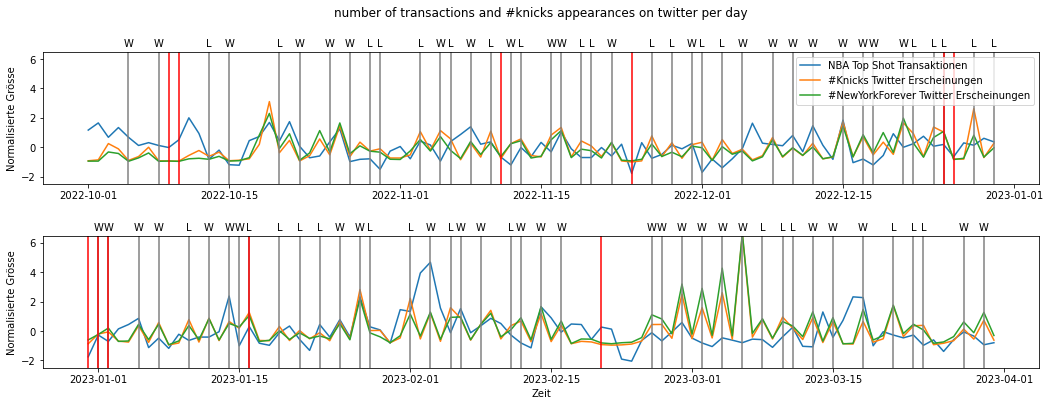

In [4]:
# Define how often to split the data (with =2: oct-jan, jan-april)
data_split = 2

# Initialize plot
fig, axs = plt.subplots(data_split, 1, figsize=(15, 6))

# Loop through subplots
for i in range(data_split):

    # Split the data accordingly
    index_split = int(len(data_tw) / data_split)
    data_tw_split = data_tw.iloc[i * index_split : (i+1) * index_split]

    # Plot the transactions and hashtag data
    axs[i].plot(data_tw_split.index, data_tw_split['trans norm'], label='NBA Top Shot Transaktionen')
    axs[i].plot(data_tw_split.index, data_tw_split['tw #knicks norm'], label='#Knicks Twitter Erscheinungen')
    axs[i].plot(data_tw_split.index, data_tw_split['tw #NewYorkForever norm'], label='#NewYorkForever Twitter Erscheinungen')


    # Get all dates, where a game has been won or lost
    dates_inscope = data_tw_split.loc[data_tw_split['resultat'].dropna().index].index

    # Loop through all dates in scope
    for date in dates_inscope:
        if date in data_tw_split.index:
            value = data_tw_split.loc[date, 'resultat']

            # Add a vertical line and respective description
            if value == 0.:
                axs[i].axvline(x=date, color='grey')
                axs[i].text(date, 1.1, 'L', ha='center', va='top', transform=axs[i].get_xaxis_transform())
            elif value == 1.:
                axs[i].axvline(x=date, color='grey')
                axs[i].text(date, 1.1, 'W', ha='center', va='top',transform=axs[i].get_xaxis_transform())

    # Get all dates, where it is a holiday
    holiday_dates = data_tw_split.loc[data_tw_split['ferien'] == 1].index

    # Loop through all dates in scope
    for date in holiday_dates:
        if date in data_tw_split.index:
            # Add a vertical red line for holidays
            axs[i].axvline(x=date, color='red')

    # Set the y-label and axis limits
    axs[i].set_ylabel('Normalisierte Grösse')
    axs[i].set_ylim(-2.5, 6.5)

# Set overall title, legend and x-label
axs[1].set_xlabel('Zeit')
axs[0].legend(loc='upper right')
axs[0].set_title('number of transactions and #knicks appearances on twitter per day', pad=35)

# Squeeze plot to fit properly
fig.tight_layout(pad=2.0)


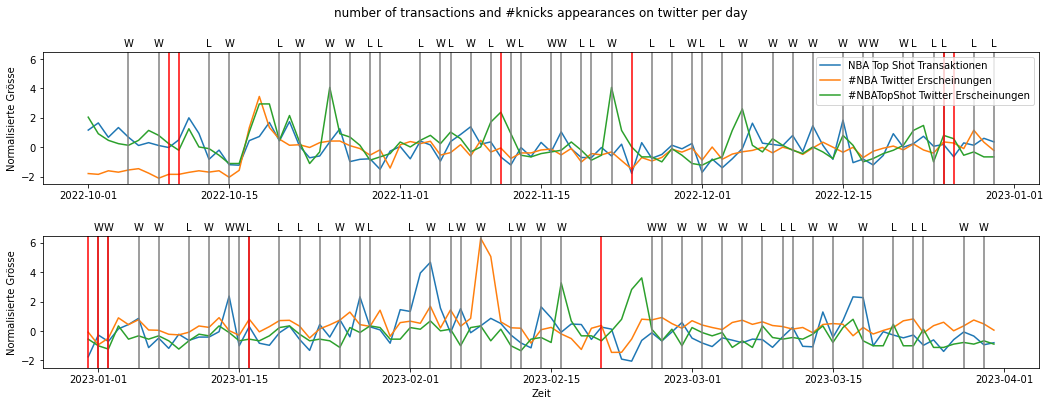

In [5]:
# Define how often to split the data (with =2: oct-jan, jan-april)
data_split = 2

# Initialize plot
fig, axs = plt.subplots(data_split, 1, figsize=(15, 6))

# Loop through subplots
for i in range(data_split):

    # Split the data accordingly
    index_split = int(len(data_tw) / data_split)
    data_tw_split = data_tw.iloc[i * index_split : (i+1) * index_split]

    # Plot the transactions and hashtag data
    axs[i].plot(data_tw_split.index, data_tw_split['trans norm'], label='NBA Top Shot Transaktionen')
    axs[i].plot(data_tw_split.index, data_tw_split['tw #NBA norm'], label='#NBA Twitter Erscheinungen')
    axs[i].plot(data_tw_split.index, data_tw_split['tw #NBATopShot norm'], label='#NBATopShot Twitter Erscheinungen')


    # Get all dates, where a game has been won or lost
    dates_inscope = data_tw_split.loc[data_tw_split['resultat'].dropna().index].index

    # Loop through all dates in scope
    for date in dates_inscope:
        if date in data_tw_split.index:
            value = data_tw_split.loc[date, 'resultat']

            # Add a vertical line and respective description
            if value == 0.:
                axs[i].axvline(x=date, color='grey')
                axs[i].text(date, 1.1, 'L', ha='center', va='top', transform=axs[i].get_xaxis_transform())
            elif value == 1.:
                axs[i].axvline(x=date, color='grey')
                axs[i].text(date, 1.1, 'W', ha='center', va='top',transform=axs[i].get_xaxis_transform())

    # Get all dates, where it is a holiday
    holiday_dates = data_tw_split.loc[data_tw_split['ferien'] == 1].index

    # Loop through all dates in scope
    for date in holiday_dates:
        if date in data_tw_split.index:
            # Add a vertical red line for holidays
            axs[i].axvline(x=date, color='red')

    # Set the y-label and axis limits
    axs[i].set_ylabel('Normalisierte Grösse')
    axs[i].set_ylim(-2.5, 6.5)

# Set overall title, legend and x-label
axs[1].set_xlabel('Zeit')
axs[0].legend(loc='upper right')
axs[0].set_title('number of transactions and #knicks appearances on twitter per day', pad=35)

# Squeeze plot to fit properly
fig.tight_layout(pad=2.0)


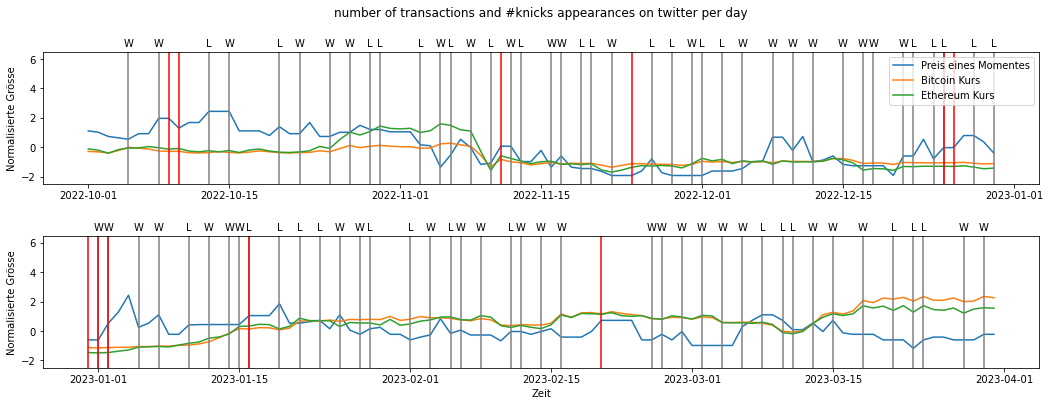

In [6]:
# Define how often to split the data (with =2: oct-jan, jan-april)
data_split = 2

# Initialize plot
fig, axs = plt.subplots(data_split, 1, figsize=(15, 6))

# Loop through subplots
for i in range(data_split):

    # Split the data accordingly
    index_split = int(len(data_tw) / data_split)
    data_tw_split = data_tw.iloc[i * index_split : (i+1) * index_split]

    # Plot the transactions and hashtag data
    axs[i].plot(data_tw_split.index, data_tw_split['Preis Moment norm'], label='Preis eines Momentes')
    axs[i].plot(data_tw_split.index, data_tw_split['BK norm'], label='Bitcoin Kurs')
    axs[i].plot(data_tw_split.index, data_tw_split['ETH norm'], label='Ethereum Kurs')


    # Get all dates, where a game has been won or lost
    dates_inscope = data_tw_split.loc[data_tw_split['resultat'].dropna().index].index

    # Loop through all dates in scope
    for date in dates_inscope:
        if date in data_tw_split.index:
            value = data_tw_split.loc[date, 'resultat']

            # Add a vertical line and respective description
            if value == 0.:
                axs[i].axvline(x=date, color='grey')
                axs[i].text(date, 1.1, 'L', ha='center', va='top', transform=axs[i].get_xaxis_transform())
            elif value == 1.:
                axs[i].axvline(x=date, color='grey')
                axs[i].text(date, 1.1, 'W', ha='center', va='top',transform=axs[i].get_xaxis_transform())

    # Get all dates, where it is a holiday
    holiday_dates = data_tw_split.loc[data_tw_split['ferien'] == 1].index

    # Loop through all dates in scope
    for date in holiday_dates:
        if date in data_tw_split.index:
            # Add a vertical red line for holidays
            axs[i].axvline(x=date, color='red')

    # Set the y-label and axis limits
    axs[i].set_ylabel('Normalisierte Grösse')
    axs[i].set_ylim(-2.5, 6.5)

# Set overall title, legend and x-label
axs[1].set_xlabel('Zeit')
axs[0].legend(loc='upper right')
axs[0].set_title('number of transactions and #knicks appearances on twitter per day', pad=35)

# Squeeze plot to fit properly
fig.tight_layout(pad=2.0)


    Regressionskoeffizient: 0.0403


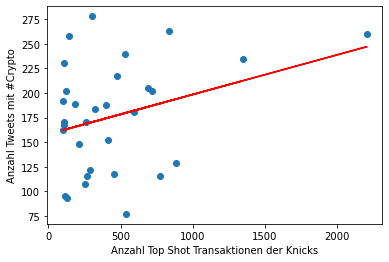

    Regressionskoeffizient: 0.0403


In [550]:
#Regressionsanalyse

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Lade die Daten in ein DataFrame
df_LR = pd.read_excel('C:/Users/yanni/Desktop/Try/NBATopShotDataAgregated.xlsx', sheet_name='Clean Tweets').iloc[:31]

# Definiere die unabhängige und abhängige Variable
X = df_LR['tw #NFT'].values.reshape(-1,1)
y = df_LR['transaktion'].values.reshape(-1,1)

# Initialisiere das lineare Regressionsmodell
reg = LinearRegression()

# Trainiere das Modell mit den Daten
reg.fit(X, y)

print("    Regressionskoeffizient: {:.4f}".format(round(reg.coef_[0][0], 4)))


# Erstelle eine Scatter-Plot-Darstellung der Daten und der Regressionsgerade
plt.scatter(X, y)
plt.plot(X, reg.predict(X), color='red')
plt.xlabel('Anzahl Top Shot Transaktionen der Knicks')
plt.ylabel('Anzahl Tweets mit #Crypto')
plt.show()

# Gib den Regressionskoeffizienten und den y-Achsenabschnitt aus
print("    Regressionskoeffizient: {:.4f}".format(round(reg.coef_[0][0], 4)))








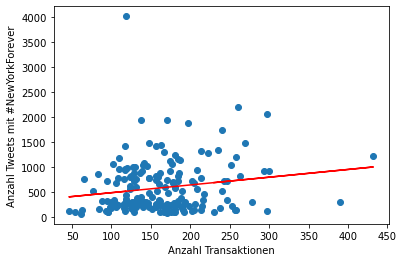

    Regressionskoeffizient:  1.5479719783393429


In [551]:
#Regressionsanalyse

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Lade die Daten in ein DataFrame
df_LR = pd.read_excel('C:/Users/yanni/Desktop/Try/NBATopShotDataAgregated.xlsx', sheet_name='Back up').iloc[:182]

# Definiere die unabhängige und abhängige Variable
X = df_LR['transaktion'].values.reshape(-1,1)
y = df_LR['tw #knicks'].values.reshape(-1,1)

# Initialisiere das lineare Regressionsmodell
reg = LinearRegression()

# Trainiere das Modell mit den Daten
reg.fit(X, y)

# Erstelle eine Scatter-Plot-Darstellung der Daten und der Regressionsgerade
plt.scatter(X, y)
plt.plot(X, reg.predict(X), color='red')
plt.xlabel('Anzahl Transaktionen')
plt.ylabel('Anzahl Tweets mit #NewYorkForever')
plt.show()

# Gib den Regressionskoeffizienten und den y-Achsenabschnitt aus
print("    Regressionskoeffizient: ", reg.coef_[0][0])




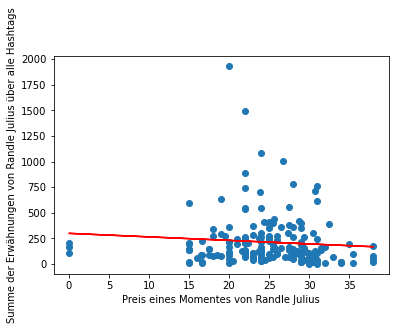

    Regressionskoeffizient:  -3.4369210299760193


In [140]:
#Regressionsanalyse

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Lade die Daten in ein DataFrame
df_LR = pd.read_excel('C:/Users/yanni/Desktop/Try/NBATopShotDataAgregated.xlsx', sheet_name='Back up').iloc[:182]

# Definiere die unabhängige und abhängige Variable
X = df_LR['Preis von einem Moment'].values.reshape(-1,1)
y = df_LR['Summe Erwähnung'].values.reshape(-1,1)

# Initialisiere das lineare Regressionsmodell
reg = LinearRegression()

# Trainiere das Modell mit den Daten
reg.fit(X, y)

# Erstelle eine Scatter-Plot-Darstellung der Daten und der Regressionsgerade
plt.scatter(X, y)
plt.plot(X, reg.predict(X), color='red')
plt.xlabel('Preis eines Momentes von Randle Julius')
plt.ylabel('Summe der Erwähnungen von Randle Julius über alle Hashtags')
plt.show()

# Gib den Regressionskoeffizienten und den y-Achsenabschnitt aus
print("    Regressionskoeffizient: ", reg.coef_[0][0])





In [366]:
#Regressionsanalyse -> signifikanztest


import numpy as np
import statsmodels.api as sm

# Lade die Daten in ein DataFrame
df_LR = pd.read_excel('C:/Users/yanni/Desktop/Try/NBATopShotDataAgregated.xlsx', sheet_name='Back up').iloc[:182]

# Definiere die unabhängige und abhängige Variable
X = df_LR['transaktion'].values.reshape(-1,1)
y = df_LR['tw #knicks'].values.reshape(-1,1)

# Füge Intercept hinzu
X = sm.add_constant(X)

# Schätzen Sie das lineare Regressionsmodell
model = sm.OLS(y, X).fit()

# Berechnen Sie den t-Statistik und den p-Wert für den Regressionskoeffizienten
t_value = model.tvalues[1]
p_value = model.pvalues[1]

# Gib den t-Statistik und den p-Wert aus
print("p-Wert: {:.4f}".format(p_value))
print("t-Wert) {:.4f}".format(t_value, corr, corr, n))


    


p-Wert: 0.0212
t-Wert) 2.3244


In [ ]:
#Analyse auf Spieler Ebene

In [744]:
#Korrelationsanalyse -> Signifikanztest

import pandas as pd
import scipy.stats as stats
import numpy as np

# Laden der Daten in ein DataFrame
df_LR = pd.read_excel('C:/Users/yanni/Desktop/Try/Test Data.xlsx', sheet_name='Analysis Ranlde Julius').iloc[123]

# Berechnen der Korrelation und des zugehörigen p-Werts
corr, p_value = stats.pearsonr(df_LR['Preis Moment'], df_LR['ETH'])

# Berechnen des t-Werts
n = len(df_LR['Preis Moment'])
t_value = corr * ((n - 2) / (1 - corr**2))**0.5

# Berechnen der kritischen Werte und des Ablehnungsbereichs
alpha = 0.05
t_crit = stats.t.ppf(alpha/2, n-2)
reject_left = t_value < -t_crit
reject_right = t_value > t_crit
reject_both = reject_left or reject_right

# Ausgabe der Ergebnisse und Rechenschritte
#print("Korrelationskoeffizient: {:.3f}".format(corr))
print(corr)
print("p-Wert: {:.4f}".format(p_value))
print("t-Wert) {:.4f}".format(t_value, corr, corr, n))



-0.47127123674133947
p-Wert: 0.0074
t-Wert) -2.8774


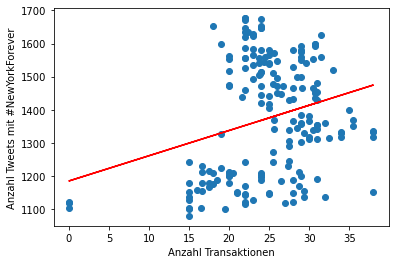

    Regressionskoeffizient:  7.62438092542388


In [760]:
#Regressionsanalyse

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Lade die Daten in ein DataFrame
df_LR = pd.read_excel('C:/Users/yanni/Desktop/Try/Test Data.xlsx', sheet_name='Analysis Ranlde Julius').iloc[:182]

# Definiere die unabhängige und abhängige Variable
X = df_LR['Preis Moment'].values.reshape(-1,1)
y = df_LR['ETH'].values.reshape(-1,1)

# Initialisiere das lineare Regressionsmodell
reg = LinearRegression()

# Trainiere das Modell mit den Daten
reg.fit(X, y)

# Erstelle eine Scatter-Plot-Darstellung der Daten und der Regressionsgerade
plt.scatter(X, y)
plt.plot(X, reg.predict(X), color='red')
plt.xlabel('Anzahl Transaktionen')
plt.ylabel('Anzahl Tweets mit #NewYorkForever')
plt.show()

# Gib den Regressionskoeffizienten und den y-Achsenabschnitt aus
print("    Regressionskoeffizient: ", reg.coef_[0][0])